# Installing necessary packages:



mlogit,  
dfidx

In [ ]:
install.packages('mlogit')
install.packages('dfidx')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘dfidx’, ‘Formula’, ‘zoo’, ‘lmtest’, ‘statmod’, ‘Rdpack’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Exploratory Analysis and Data Pre-processing

In [ ]:
# Setting random number generator to use pre R 3.6 method

if (getRversion() >= "3.6.0") suppressWarnings(RNGversion("3.5.0"))

Setting up attributes to be used in Share Simulator

In [ ]:
# Setting up attributes to be used in Share Simulator
attrib <- list(Price  = c("Value(3€-10€)", "Popular(10€-15€)", "Premium(15€-30€)", "Luxury(50€-100€)"),
               Brand = c("Cantina Toblino", "Cavit", "Ferrari","Mezzacorona"),
               Type.of.Wine = c("Red wine", "Rose wine", "Sparkling wine", "White wine"),
               Percentage.of.Alcohol = c("5.5 %", "7 %", "12 %", "18 %"),
               Aging.time.of.Wine = c("1 year", "2 years", "3 years", "4 years", "5 years"))

Load the dataset hosted on Git using read.csv. Run a summary.

In [ ]:
# Load the data from hosted repo for reproducability of code

df1 <- read.csv("https://raw.githubusercontent.com/KSwaviman/Conjoint-Analysis/main/conjoint_survey_resp_v1.csv",
                   colClasses = c(Price = "factor", Brand = "factor",Type.of.Wine = "factor",Percentage.of.Alcohol = "factor",
                                  Aging.time.of.Wine = "factor",
                                  choice="integer"))
# Summary of data
summary(df1)

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“not all columns named in 'colClasses' exist”


       X            resp.id          ques       alt           
 Min.   :  0.0   Min.   : 1.0   Min.   :1   Length:840        
 1st Qu.:209.8   1st Qu.: 8.0   1st Qu.:2   Class :character  
 Median :419.5   Median :15.5   Median :4   Mode  :character  
 Mean   :419.5   Mean   :15.5   Mean   :4                     
 3rd Qu.:629.2   3rd Qu.:23.0   3rd Qu.:6                     
 Max.   :839.0   Max.   :30.0   Max.   :7                     
              Price                 Brand             Type.of.Wine
 Luxury(50€-100€):198   Cantina Toblino:231   Red wine      :199  
 Popular(10€-15€):247   Cavit          :203   Rose wine     :194  
 Premium(15€-30€):200   Ferrari        :213   Sparkling wine:234  
 Value(3€-10€)   :195   Mezzacorona    :193   White wine    :213  
                                                                  
                                                                  
 Percentage.of.Alcohol Aging.time.of.Wine      Age            Sex           
 12 % :218   

From the summary we observe, the features of interest are of desired data types.    
Choice column is in integer and Predictors in Factor.

In [ ]:
# We select only the predictor columns and store in in a new dataframe.
# Excluding the demographic info from collected survey data.

df = df1[,c(2,3,4,5,6,7,8,9,17)]

In [ ]:
# To check the head of data

head(df)

,resp.id,ques,alt,Price,Brand,Type.of.Wine,Percentage.of.Alcohol,Aging.time.of.Wine,Choice
,<int>,<int>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,1,1,Option 1,Value(3€-10€),Cavit,White wine,5.5 %,3 years,0
2,1,1,Option 2,Popular(10€-15€),Mezzacorona,White wine,18 %,1 year,1
3,1,1,Option 3,Premium(15€-30€),Ferrari,Rose wine,12 %,1 year,0
4,1,1,Option 4,Popular(10€-15€),Ferrari,Rose wine,18 %,4 years,0
5,1,2,Option 1,Premium(15€-30€),Mezzacorona,Sparkling wine,7 %,4 years,1
6,1,2,Option 2,Value(3€-10€),Cantina Toblino,Rose wine,12 %,5 years,0


Cross Tab to check the count per category. 

In [ ]:
xtabs(Choice ~ Brand, data=df)

Brand
Cantina Toblino           Cavit         Ferrari     Mezzacorona 
             42              47              66              55 

Xtab also helps us understand if we have any imbalance as well as missing values.

In [ ]:
xtabs(Choice ~ Price, data=df)

Price
Luxury(50€-100€) Popular(10€-15€) Premium(15€-30€)    Value(3€-10€) 
              20               81               47               62 

The data appears fine.

# Fitting a choice model with Conditional Logistic Regression:

## Transforming data:  

Before feeding the dataframe to mlog we need to perform certain transformation to the data.

In [ ]:
library(mlogit)

# Transforming the dataframe to fit into mlogit() later:

# building a new column chid as the existing indexes aren't unique. 
# /4 as we have 4 alternative profiles in each question.
df$chid <- rep(1:(nrow(df)/4), each=4)

# converting Choice values to logical as dfidx expects logical choice input
df$Choice = as.logical(df$Choice)

# Making alt factors numbers.
df$alt = factor(df$alt,
                levels = c('Option 1','Option 2','Option 3', 'Option 4'),
                labels = c(1,2,3,4))

# shape the data for mlogit
cbc.mlogit <- dfidx(df, choice="Choice", idx=list(c("chid", "resp.id"), "alt" ))

Loading required package: dfidx


Attaching package: ‘dfidx’


The following object is masked from ‘package:stats’:

    filter




In [ ]:
# df$Choice = as.double(df$Choice) 

Checking the transformed data from dfidx.  
Identifies distinct indexes, separate from the main dataframe.  


In [ ]:
head(cbc.mlogit)

~~~~~~~
 first 10 observations out of 840 
~~~~~~~
   ques            Price           Brand   Type.of.Wine Percentage.of.Alcohol
1     1    Value(3€-10€)           Cavit     White wine                 5.5 %
2     1 Popular(10€-15€)     Mezzacorona     White wine                  18 %
3     1 Premium(15€-30€)         Ferrari      Rose wine                  12 %
4     1 Popular(10€-15€)         Ferrari      Rose wine                  18 %
5     2 Premium(15€-30€)     Mezzacorona Sparkling wine                   7 %
6     2    Value(3€-10€) Cantina Toblino      Rose wine                  12 %
7     2 Luxury(50€-100€)         Ferrari Sparkling wine                  12 %
8     2 Luxury(50€-100€)     Mezzacorona       Red wine                   7 %
9     3 Luxury(50€-100€)         Ferrari     White wine                   7 %
10    3    Value(3€-10€) Cantina Toblino Sparkling wine                   7 %
   Aging.time.of.Wine Choice idx
1             3 years  FALSE 1:1
2             1 year    T

## Fitting the MLogit Model without intercepts:

In [ ]:
# fit the models
library(mlogit)

m1 <- mlogit(Choice ~ 0 + Price	+ Brand	+ Type.of.Wine	+Percentage.of.Alcohol	+Aging.time.of.Wine, data = cbc.mlogit)

summary(m1)


Call:
mlogit(formula = Choice ~ 0 + Price + Brand + Type.of.Wine + 
    Percentage.of.Alcohol + Aging.time.of.Wine, data = cbc.mlogit, 
    method = "nr")

Frequencies of alternatives:choice
      1       2       3       4 
0.20476 0.26667 0.22381 0.30476 

nr method
4 iterations, 0h:0m:0s 
g'(-H)^-1g = 7.07E-07 
gradient close to zero 

Coefficients :
                            Estimate Std. Error z-value  Pr(>|z|)    
PricePopular(10€-15€)       1.503812   0.274514  5.4781 4.299e-08 ***
PricePremium(15€-30€)       1.034239   0.294471  3.5122 0.0004444 ***
PriceValue(3€-10€)          1.423789   0.285615  4.9850 6.197e-07 ***
BrandCavit                  0.353767   0.250166  1.4141 0.1573237    
BrandFerrari                0.875427   0.243341  3.5975 0.0003213 ***
BrandMezzacorona            0.663960   0.250648  2.6490 0.0080736 ** 
Type.of.WineRose wine      -0.083027   0.254559 -0.3262 0.7443021    
Type.of.WineSparkling wine  0.217729   0.236474  0.9207 0.3571916    
Type.of.WineWh

Explanation of the model output goes here ....   

x     ------    x    ------    x

## Fitting the MLogit Model with intercepts:

In [ ]:
m2 <- mlogit(Choice ~ Price	+ Brand	+ Type.of.Wine	+Percentage.of.Alcohol	+Aging.time.of.Wine, data = cbc.mlogit)

summary(m2)


Call:
mlogit(formula = Choice ~ Price + Brand + Type.of.Wine + Percentage.of.Alcohol + 
    Aging.time.of.Wine, data = cbc.mlogit, method = "nr")

Frequencies of alternatives:choice
      1       2       3       4 
0.20476 0.26667 0.22381 0.30476 

nr method
5 iterations, 0h:0m:0s 
g'(-H)^-1g = 1.07E-06 
successive function values within tolerance limits 

Coefficients :
                            Estimate Std. Error z-value  Pr(>|z|)    
(Intercept):2               0.270761   0.214650  1.2614 0.2071636    
(Intercept):3               0.141093   0.223449  0.6314 0.5277566    
(Intercept):4               0.389553   0.210497  1.8506 0.0642213 .  
PricePopular(10€-15€)       1.496454   0.275723  5.4274 5.719e-08 ***
PricePremium(15€-30€)       1.011992   0.298370  3.3917 0.0006945 ***
PriceValue(3€-10€)          1.392920   0.287908  4.8381 1.311e-06 ***
BrandCavit                  0.380192   0.253446  1.5001 0.1335906    
BrandFerrari                0.873869   0.244195  3.5786 0.0003455

Explanation of the model output goes here ....   

x     ------    x    ------    x

## Comparing M1 and M2 models using Likelihood Ratio Test:

In [ ]:
# comparing two models, m1 and m2 using likelihood ratio test 

(lrtest(m1, m2))

,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,16,-260.0942,NA,NA,NA
2,19,-258.1610,3,3.86641,0.2762554


Likelihood Ratio Test gives a p value of 0.27 which is way higher than the conventional threshold of 0.05.   
Hence we fail to reject the null hypothesis i.e. there exists no significant ifference between m1 model and m2 model.  

This also means, excluding intercepts from our model doesn't affect the result significantly. Hence we can neglect the intercept terms henceforth.

## Share Simulator:

In [ ]:
# function for predicting shares from a multinomial logit model 

predict.mnl <- function(model, data) {
  # Explanation for the arguments passed to this function:
  # model: mlogit object returned by mlogit()
  # data: a data frame containing the set of designs for which you want to 
  #       predict shares.  Same format at the data used to estimate model. 
  data.model <- model.matrix(update(model$formula, 0 ~ .), data = data)[ , -1]
  #print(data.model)
  #print(model$coef)
  utility <- data.model%*%model$coef
  #print(utility) # just to see the utility matrix
  share <- exp(utility)/sum(exp(utility))
  cbind(share, data)
}

In [ ]:
# handpicking base as well as competitors from the master dataframe manually:

(new.data <- expand.grid(attrib)[c(8, 1, 5, 71, 33, 69), ]) # find attrib at top

,Price,Brand,Type.of.Wine,Percentage.of.Alcohol,Aging.time.of.Wine
,<fct>,<fct>,<fct>,<fct>,<fct>
8,Luxury(50€-100€),Cavit,Red wine,5.5 %,1 year
1,Value(3€-10€),Cantina Toblino,Red wine,5.5 %,1 year
5,Value(3€-10€),Cavit,Red wine,5.5 %,1 year
71,Premium(15€-30€),Cavit,Red wine,7 %,1 year
33,Value(3€-10€),Cantina Toblino,Sparkling wine,5.5 %,1 year
69,Value(3€-10€),Cavit,Red wine,7 %,1 year


In [ ]:
predict.mnl(m1, new.data)

,share,Price,Brand,Type.of.Wine,Percentage.of.Alcohol,Aging.time.of.Wine
,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
8,0.36116806,Luxury(50€-100€),Cavit,Red wine,5.5 %,1 year
1,0.06105571,Value(3€-10€),Cantina Toblino,Red wine,5.5 %,1 year
5,0.08696920,Value(3€-10€),Cavit,Red wine,5.5 %,1 year
71,0.30608669,Premium(15€-30€),Cavit,Red wine,7 %,1 year
33,0.07590749,Value(3€-10€),Cantina Toblino,Sparkling wine,5.5 %,1 year
69,0.10881286,Value(3€-10€),Cavit,Red wine,7 %,1 year


## Sensitivity Plot:

For Share Simulation we used row 8 as baseline design and row 1, 5, 71, 33, 69 as competitor designs.  
Separating the two for sensitivity plot.

In [ ]:
base.data <- expand.grid(attrib)[c(8), ]

competitor.data <- expand.grid(attrib)[c(1, 5, 71, 33, 69), ]

In [ ]:
# Share sensitivity
sensitivity.mnl <- function(model, attrib, base.data, competitor.data) {
  # Function for creating data for a share-sensitivity chart
  # model: mlogit object returned by mlogit() function
  # attrib: list of vectors with attribute levels to be used in sensitivity
  # base.data: data frame containing baseline design of target product
  # competitor.data: data frame contining design of competitive set
  data <- rbind(base.data, competitor.data)
  base.share <- predict.mnl(model, data)[1, 1]
  share <- NULL
  for (a in seq_along(attrib)) {
    for (i in attrib[[a]]) {
      data[1,] <- base.data
      data[1,a] <- i
      share <- c(share, predict.mnl(model, data)[1, 1])
    }
  }
  data.frame(level=unlist(attrib), share=share, increase=share-base.share)
}

### Trade Off Table:

In [ ]:
# trade off table gives a clearer picture of how the share would get affected 
# when attribues are varied from the base design.
# baseline design : [Price4: Luxury, Brand2: Cavit, Type.of.Wine1:	Red wine, 
#                Percentage.of.Alcohol1:	5.5 %, Aging.time.of.Wine1:	1 year]

(tradeoff <- sensitivity.mnl(m1, attrib, base.data, competitor.data))

,level,share,increase
,<chr>,<dbl>,<dbl>
Price1,Value(3€-10€),0.1198251,-0.241342953
Price2,Popular(10€-15€),0.3798287,0.018660654
Price3,Premium(15€-30€),0.2769085,-0.084259543
Price4,Luxury(50€-100€),0.3611681,0.000000000
Brand1,Cantina Toblino,0.2841303,-0.077037788
Brand2,Cavit,0.3611681,0.000000000
Brand3,Ferrari,0.4878428,0.126674770
Brand4,Mezzacorona,0.4353377,0.074169660
Type.of.Wine1,Red wine,0.3611681,0.000000000


Explanation of the trade off table goes here ...  

x ---------  x  --------- x

### Barplot to show sensitivity to varying combinations:

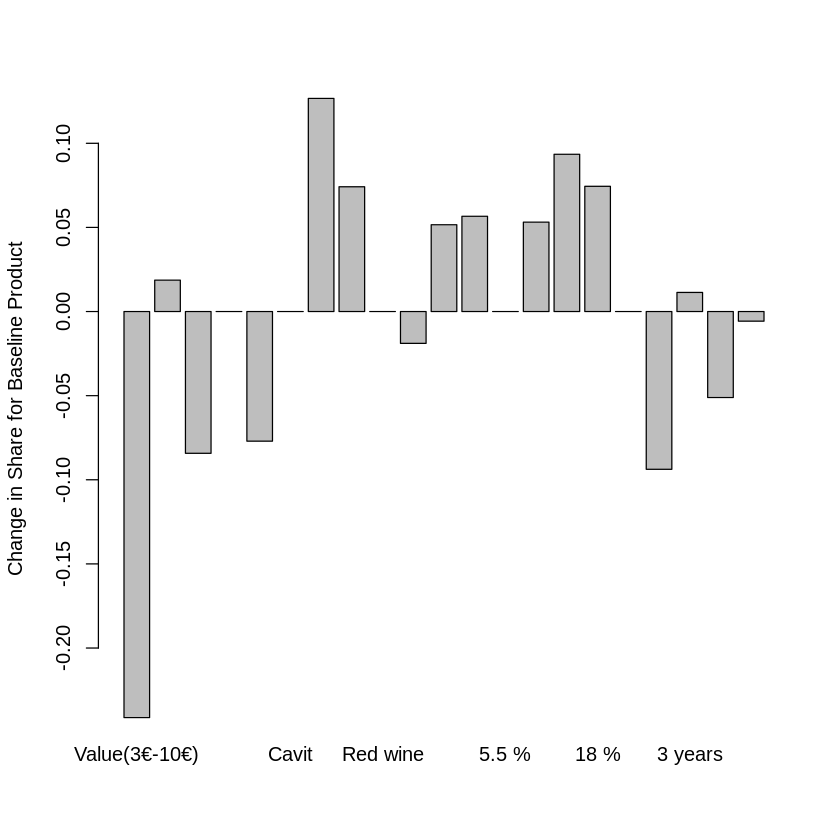

In [ ]:
# Sensitivity plot using the tradeoff table

barplot(tradeoff$increase, horiz=FALSE, names.arg=tradeoff$level,
        ylab="Change in Share for Baseline Product")

Explanation of Sensitivity plot goes here....  
Professor, you are smart enough. You dont need me to elaborate on this at this point. You get it. #peace 🕊 ✌

# Fitting a choice model considering Customer Heterogenity:

Customer Herterogenity:  
Different people have different preferences.  Hence individual level coefficients can it the data better than sample level models and also with better accuracy in prediction as compared to sample level models.  


\\

In this segment we will cover 3 aspects.  
diversity of preference | customer targetting | Segmentation  





In [ ]:
m1.rpar <- rep("n", length=length(m1$coef))
names(m1.rpar) <- names(m1$coef)
m1.rpar

PricePopular(10€-15€)      PricePremium(15€-30€) 
                       "n"                        "n" 
        PriceValue(3€-10€)                 BrandCavit 
                       "n"                        "n" 
              BrandFerrari           BrandMezzacorona 
                       "n"                        "n" 
     Type.of.WineRose wine Type.of.WineSparkling wine 
                       "n"                        "n" 
    Type.of.WineWhite wine  Percentage.of.Alcohol18 % 
                       "n"                        "n" 
Percentage.of.Alcohol5.5 %   Percentage.of.Alcohol7 % 
                       "n"                        "n" 
 Aging.time.of.Wine2 years  Aging.time.of.Wine3 years 
                       "n"                        "n" 
 Aging.time.of.Wine4 years  Aging.time.of.Wine5 years 
                       "n"                        "n"

In [ ]:
m1.hier <- mlogit(Choice ~ 0 + Price	+ Brand	+ Type.of.Wine	+Percentage.of.Alcohol	+Aging.time.of.Wine, 
                  data = cbc.mlogit, 
                  panel=TRUE, rpar = m1.rpar, correlation = FALSE)
summary(m1.hier)


Call:
mlogit(formula = Choice ~ 0 + Price + Brand + Type.of.Wine + 
    Percentage.of.Alcohol + Aging.time.of.Wine, data = cbc.mlogit, 
    rpar = m1.rpar, correlation = FALSE, panel = TRUE)

Frequencies of alternatives:choice
      1       2       3       4 
0.20476 0.26667 0.22381 0.30476 

bfgs method
34 iterations, 0h:0m:3s 
g'(-H)^-1g = 4.87E-07 
gradient close to zero 

Coefficients :
                               Estimate Std. Error z-value  Pr(>|z|)    
PricePopular(10€-15€)          2.066206   0.507813  4.0688 4.725e-05 ***
PricePremium(15€-30€)          1.383331   0.474098  2.9178 0.0035250 ** 
PriceValue(3€-10€)             1.598766   0.533355  2.9976 0.0027215 ** 
BrandCavit                     0.565028   0.423147  1.3353 0.1817780    
BrandFerrari                   1.422795   0.435506  3.2670 0.0010870 ** 
BrandMezzacorona               0.925398   0.429523  2.1545 0.0312026 *  
Type.of.WineRose wine          0.027485   0.434740  0.0632 0.9495898    
Type.of.WineSparkling

In [ ]:
stdev(m1.hier)

PricePopular(10€-15€)      PricePremium(15€-30€) 
                1.82201158                 1.28673985 
        PriceValue(3€-10€)                 BrandCavit 
                1.62544237                 0.27473064 
              BrandFerrari           BrandMezzacorona 
                1.17536178                 0.76089336 
     Type.of.WineRose wine Type.of.WineSparkling wine 
                0.56878696                 1.49718684 
    Type.of.WineWhite wine  Percentage.of.Alcohol18 % 
                0.02332135                 1.47519880 
Percentage.of.Alcohol5.5 %   Percentage.of.Alcohol7 % 
                1.83869136                 1.35425177 
 Aging.time.of.Wine2 years  Aging.time.of.Wine3 years 
                0.50444522                 0.37699850 
 Aging.time.of.Wine4 years  Aging.time.of.Wine5 years 
                0.26947498                 0.25716251

### Correlated Random Parameters Vs Independent Random Parameters:

We can either allow the random parameters to be correlated or independant.  
For this first run, we assume that we do not want random parameters to be correlated `(correlation=FALSE)`

In [ ]:
m2.hier <- update(m1.hier, correlation = TRUE)
summary(m2.hier)

ERROR: ignored